In [25]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib_inline

In [26]:
df = pd.read_csv('loan_prediction.csv', low_memory=False)
print('This is the dataset to be worked on:') 
df.head()

This is the dataset to be worked on:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
print('The number of columns in the dataset is', df.shape[1], 'and the rows contain', df.shape[0], 'items.')

The number of columns in the dataset is 13 and the rows contain 614 items.


In [28]:
df.columns = [columns.lower() for columns in df.columns]
df.rename(columns={'loanamount':'loan_amount'}, inplace=True)
print(df.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loan_amount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')


In [29]:
df = df.drop('loan_id', axis=1)

In [30]:
df.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loan_amount          22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [31]:
mod = ['gender', 'married', 'dependents', 'self_employed', 'loan_amount_term', 'credit_history']
for r in mod:
    df[r] = df[r].fillna(df[r].mode()[0])
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].median())

In [32]:
print(df.isna().sum())

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loan_amount          0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    object 
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loan_amount        614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB
None


In [34]:
print(df.describe())

       applicantincome  coapplicantincome  loan_amount  loan_amount_term  \
count       614.000000         614.000000   614.000000        614.000000   
mean       5403.459283        1621.245798   145.752443        342.410423   
std        6109.041673        2926.248369    84.107233         64.428629   
min         150.000000           0.000000     9.000000         12.000000   
25%        2877.500000           0.000000   100.250000        360.000000   
50%        3812.500000        1188.500000   128.000000        360.000000   
75%        5795.000000        2297.250000   164.750000        360.000000   
max       81000.000000       41667.000000   700.000000        480.000000   

       credit_history  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<Axes: xlabel='gender', ylabel='count'>

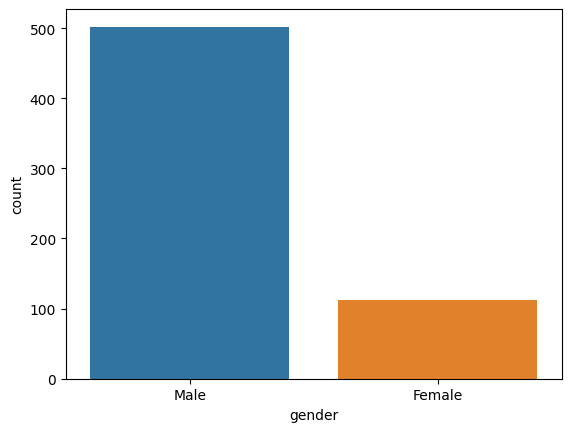

In [35]:
sns.countplot(x='gender', data=df)

loan_status
Y    422
N    192
Name: count, dtype: int64


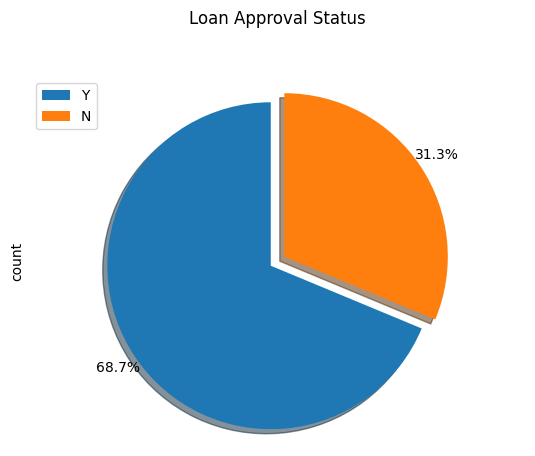

In [36]:
explode_list = [0, 0.1]  # Explode the first slice by 0.1

loan_status_counts = df['loan_status'].value_counts()
print(loan_status_counts)

loan_status_counts.plot(kind='pie',
                        autopct='%1.1f%%',
                        startangle=90,
                        shadow=True,
                        labels=None,  # remove labels on pie chart
                        pctdistance=1.12,
                        explode=explode_list)

plt.title('Loan Approval Status', y=1.12)

plt.axis('equal')  # Sets the pie chart to look like a circle.

# Add a legend using the labels from the value counts
plt.legend(labels=loan_status_counts.index, loc='upper left')

plt.show()



married
Yes    401
No     213
Name: count, dtype: int64


<Axes: title={'center': 'Marital Status Distribution'}, xlabel='married'>

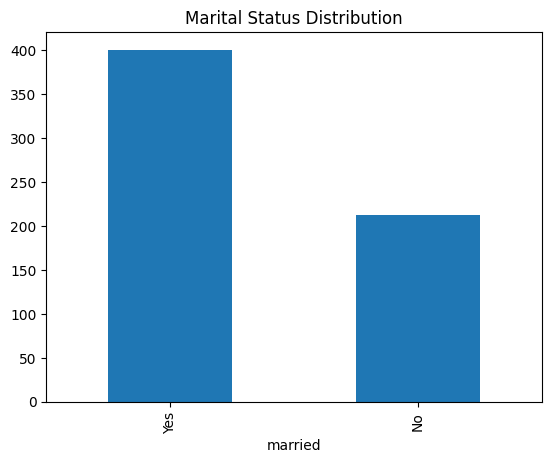

In [37]:
married_count = df['married'].value_counts()
print(married_count)
married_count.plot(kind='bar',
                   x=married_count.index, 
                    y=married_count.values, 
                    title='Marital Status Distribution')

education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: title={'center': 'Education Status Distribution'}, xlabel='education'>

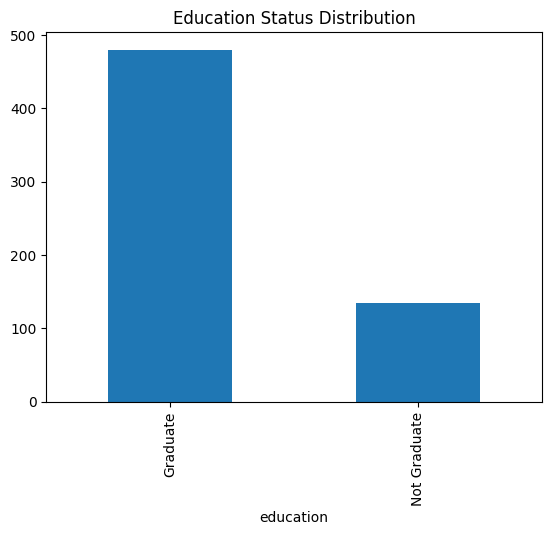

In [38]:
education_count = df['education'].value_counts()
print(education_count)
education_count.plot(kind='bar',
                   x=education_count.values, 
                   y=education_count.index,
                   title='Education Status Distribution')

self_employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: title={'center': 'Education Status Distribution'}, xlabel='self_employed'>

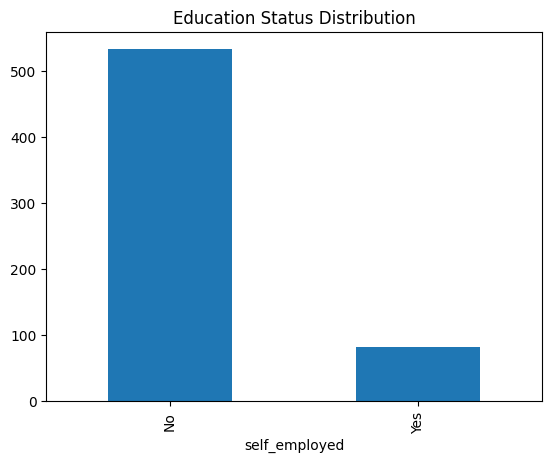

In [39]:
self_employed_count = df['self_employed'].value_counts()
print(self_employed_count)
self_employed_count.plot(kind='bar',
                   x=self_employed_count.values, 
                   y=self_employed_count.index,
                   title='Education Status Distribution')

Text(0.5, 1.0, 'Applicant Income Distribution')

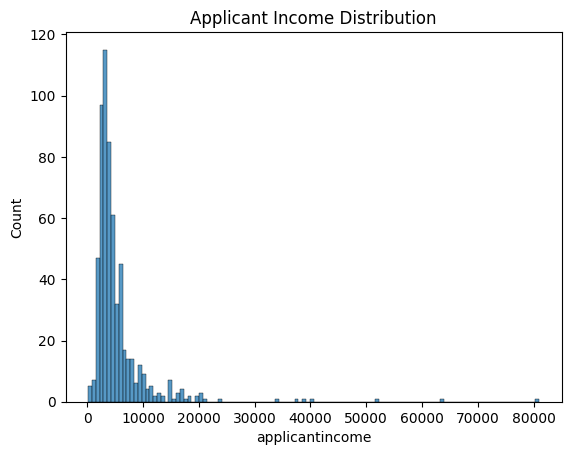

In [40]:
sns.histplot(data=df, x='applicantincome')
plt.title('Applicant Income Distribution')


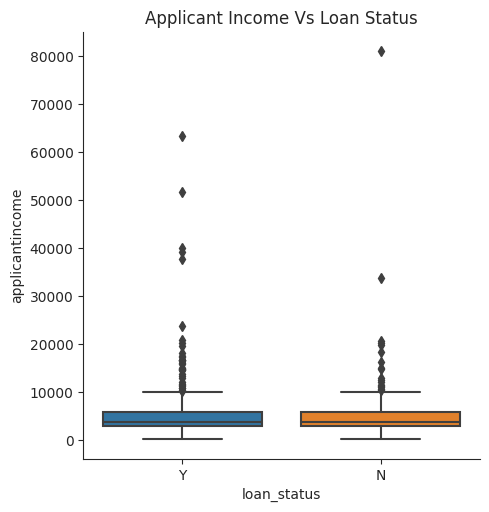

In [41]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(df,x='loan_status',y='applicantincome', 
                    kind='box')
    g.set_axis_labels('loan_status', 'applicantincome')
    plt.title('Applicant Income Vs Loan Status');

In [42]:
# Calculate the IQR
Q1 = df['applicantincome'].quantile(0.25)
Q3 = df['applicantincome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['applicantincome'] >= lower_bound) & (df['applicantincome'] <= upper_bound)]

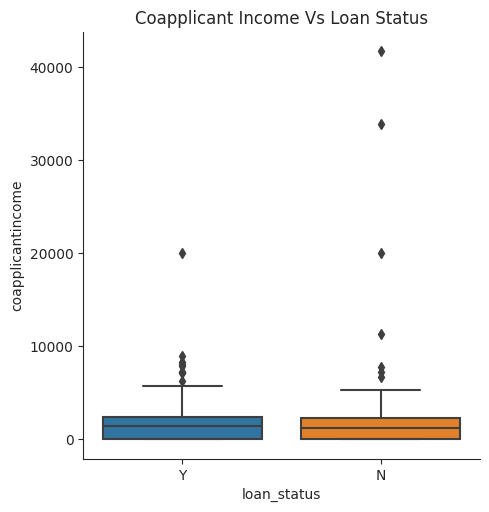

In [43]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(df,x='loan_status',y='coapplicantincome', 
                    kind='box')
    g.set_axis_labels('loan_status', 'coapplicantincome')
    plt.title('Coapplicant Income Vs Loan Status');

In [44]:
# Calculate the IQR
Q1 = df['coapplicantincome'].quantile(0.25)
Q3 = df['coapplicantincome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['coapplicantincome'] >= lower_bound) & (df['coapplicantincome'] <= upper_bound)]